In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data.add_function(lambda x: np.sin(6*x)+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.init_params()
display(sm.get_params())
mogptk.plot_sm_psd(sm)

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
mogptk.plot_sm_psd(sm)

In [ ]:
sm.set_prediction_range(0, 0.0, 5.0, n=2000)
sm.predict()
mogptk.plot(sm)

In [ ]:
sm.save('sm')

In [ ]:
sm2 = mogptk.load('sm')
sm2.set_prediction_range(0, 0.0, 10.0, n=2000)
sm2.predict()
mogptk.plot(sm2)

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

In [ ]:
mosm.init_params(plot=True)
display(mosm.get_params())

In [ ]:
mosm.train()
display(mosm.get_params())

In [ ]:
mosm.set_prediction_range(0, 0.0, 5.0, n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.init_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.set_prediction_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [3]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.13223559]), 'variance': array([[0.2287673]])},
 {'constant': array([0.11870243]), 'variance': array([[0.89920745]])},
 {'constant': array([0.61483744]), 'variance': array([[0.99277744]])}]

In [ ]:
cg.init_params()
display(cg.get_params())

In [4]:
cg.train(method='Adam', disp_graph=True)
display(cg.get_params())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


[{'constant': array([0.50143103]), 'variance': array([[0.06098799]])},
 {'constant': array([0.46259704]), 'variance': array([[0.20730906]])},
 {'constant': array([1.20694632]), 'variance': array([[0.39153558]])}]

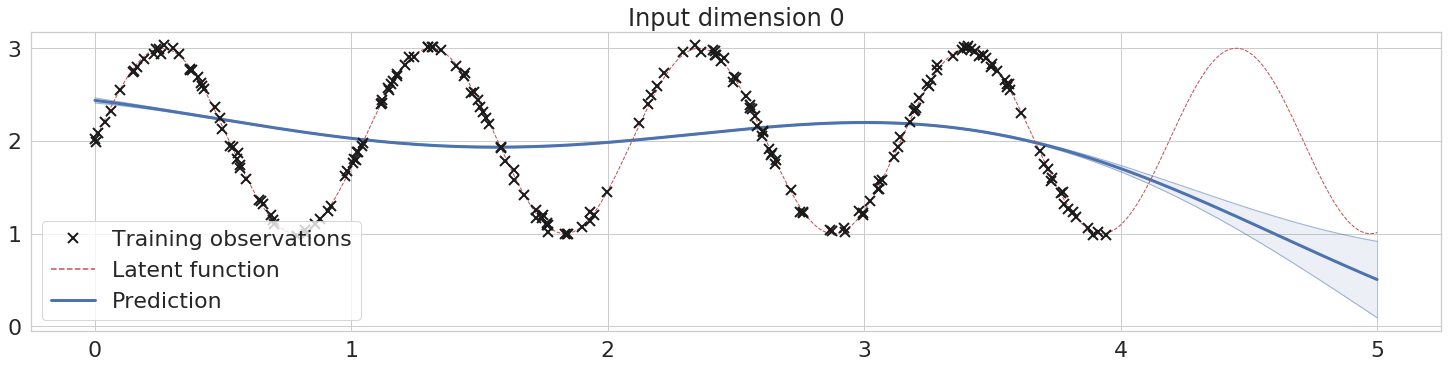

In [6]:
cg.set_prediction_range(0, 0.0, 5.0, n=200)
cg.predict(disp_graph=True)
mogptk.plot(cg)